In [979]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from scipy.stats import chi2
import warnings
warnings.filterwarnings('ignore')

In [980]:
#taking the data into a dataframe
covidstress = pd.read_excel("C:/Users/parul/Downloads/my_survey_results.xlsx")

In [981]:
covidstress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44126 entries, 0 to 44125
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   44126 non-null  int64 
 1   duration_in_seconds  44126 non-null  int64 
 2   recorded_date        44126 non-null  object
 3   age                  44126 non-null  int64 
 4   gender               44022 non-null  object
 5   edu                  43966 non-null  object
 6   employment           43819 non-null  object
 7   country              44026 non-null  object
 8   maritalstatus        43929 non-null  object
 9   riskgroup            44027 non-null  object
 10  perceived_stress_1   44126 non-null  int64 
 11  perceived_stress_2   44126 non-null  int64 
 12  perceived_stress_3   44126 non-null  int64 
 13  perceived_stress_4   44126 non-null  int64 
 14  perceived_stress_5   44126 non-null  int64 
 15  corona_concerns_1    44126 non-null  int64 
 16  coro

we can see the list of all columns from our excel sheet above, along with the count of non-null values and the data type of each column. We have a total of 44126 records and 29 columns.

In [982]:
covidstress.head()

,id,duration_in_seconds,recorded_date,age,gender,edu,employment,country,maritalstatus,riskgroup,...,corona_concerns_5,distress_1,distress_2,distress_3,distress_4,distress_5,distress_6,social_support_1,social_support_2,social_support_3
0,6,1221,2020-05-29 21:25:09,68,Male,"College degree, bachelor, master",Retired,Italy,Married/cohabiting,No,...,5,3,3,3,4,4,4,5,5,5
1,9,1952,2020-05-29 21:18:48,35,Female,"College degree, bachelor, master",Full time employed,Panama,Married/cohabiting,Yes,...,2,4,2,4,5,3,4,5,5,5
2,13,2271,2020-05-30 20:22:53,42,Female,Up to 9 years of school,Full time employed,Panama,Married/cohabiting,No,...,1,5,2,5,5,5,1,6,5,5
3,14,965,2020-05-29 19:56:50,49,Female,"Some College, short continuing education or eq...",Part time employed,Argentina,Single,No,...,4,5,5,2,5,5,2,5,5,4
4,22,7047,2020-05-29 19:47:37,69,Female,PhD/Doctorate,Retired,Mexico,Divorced/widowed,Yes,...,5,2,1,1,2,4,1,5,5,6


In [983]:
#converting object data types into their respective types
covidstress["recorded_date"] = pd.to_datetime(covidstress['recorded_date'])
covidstress["gender"] = covidstress["gender"].astype(str)

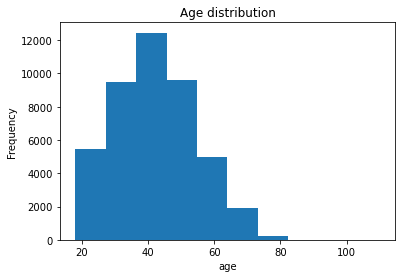

In [984]:
#plotting the distribution of age in our dataset
covidstress['age'].plot.hist(title='Age distribution')
plt.xlabel('age');

In [985]:
#checking unique gender values
covidstress["gender"].unique()

array(['Male', 'Female', 'Other/would rather not say', 'nan'],
      dtype=object)

Gender column has some rows with nan as their response. We will be replacing the nan with the 'Other/would rather not' say option.

In [986]:
covidstress["gender"]=covidstress["gender"].str.replace("nan","Other/would rather not say")

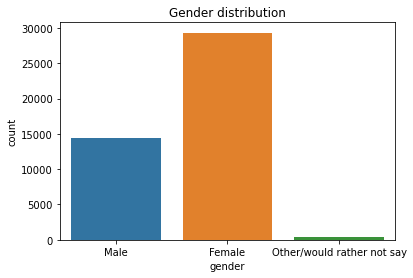

In [987]:
sns.countplot(covidstress["gender"])
plt.title("Gender distribution");

In [988]:
#checking unique education values
covidstress['edu'].unique()

array(['College degree, bachelor, master', 'Up to 9 years of school',
       'Some College, short continuing education or equivalent',
       'PhD/Doctorate', 'Up to 12 years of school', 'None', nan,
       'Up to 6 years of school', 'Uninformative response'], dtype=object)

In [989]:
#checking the null values in edu column
covidstress['edu'].isnull().sum()

160

In [990]:
#replacing null , 'None' and 'Uninformative response' options
covidstress['edu'].fillna('Other or would rather not say', inplace=True)
covidstress["edu"]=covidstress["edu"].str.replace("Uninformative response","Other or would rather not say")
covidstress["edu"]=covidstress["edu"].str.replace("None","Other or would rather not say")

In [991]:
#unique values for employment column
covidstress['employment'].unique()

array(['Retired', 'Full time employed', 'Part time employed',
       'Self-employed', 'Student', 'Not employed', nan], dtype=object)

In [992]:
#checking number of null values
covidstress['employment'].isnull().sum()

307

In [993]:
#replacing null values
covidstress['employment'].fillna('Other or would rather not say', inplace=True)

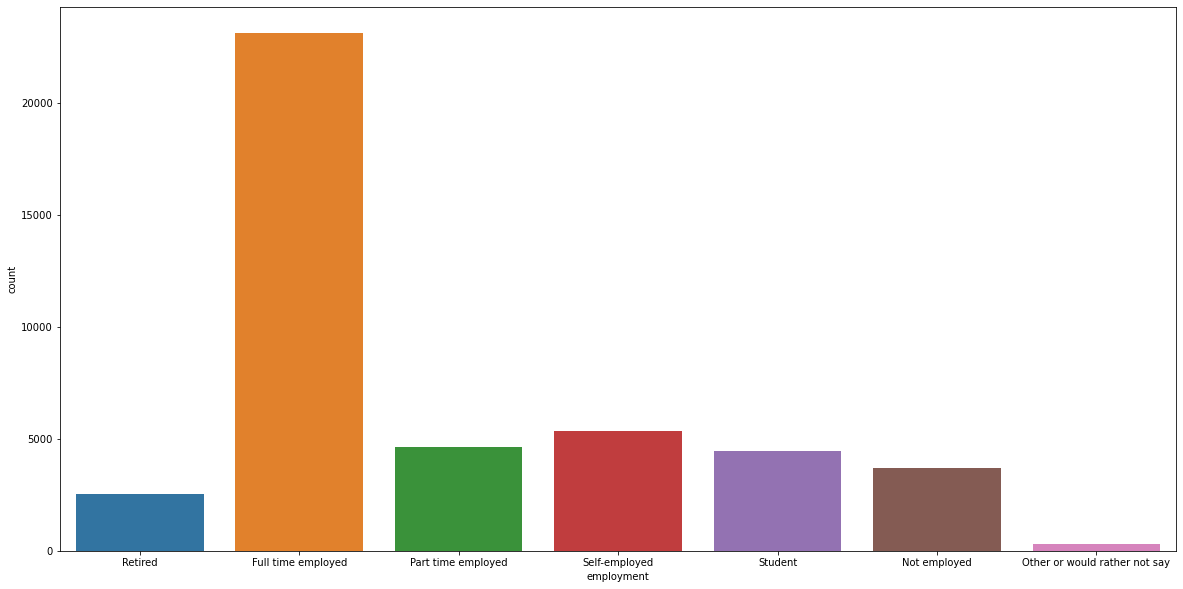

In [994]:
#plotting employment column counts
plt.figure(figsize=(20,10))
sns.countplot(covidstress["employment"]);

In [995]:
covidstress["country"].unique()

array(['Italy', 'Panama', 'Argentina', 'Mexico', 'Bulgaria', 'Denmark',
       'France', 'Bosnia and Herzegovina', 'Germany', 'Finland', 'Turkey',
       'Estonia', 'Sweden', 'Romania', 'Lithuania', 'Brazil', 'Hungary',
       'Norway', 'United Kingdom', 'Ecuador', 'Austria', 'Bahrain',
       'United States', nan, 'Slovakia', 'Serbia', 'Portugal',
       'Switzerland', 'Netherlands', 'Belgium', 'Chile', 'Korea, South',
       'Poland', 'Spain', 'Australia', 'Israel', 'Indonesia', 'Malaysia',
       'Russia', 'Croatia', 'Turkmenistan', 'Lebanon', 'South Africa',
       'other', 'Greece', 'Canada', 'Morocco', 'El Salvador', 'Colombia',
       'Venezuela', 'Czech Republic', 'Andorra', 'Bangladesh',
       'Costa Rica', 'Ireland', 'Senegal', 'Japan', 'Philippines',
       'Cyprus', 'Iceland', 'Luxembourg', 'Algeria', 'North Macedonia',
       'Pakistan', 'Côte d’Ivoire', 'Armenia', 'New Zealand',
       'Madagascar', 'Peru', 'India', 'Taiwan', 'Singapore', 'Kosovo',
       'Afghanistan', 

In [996]:
covidstress["country"].value_counts().head(5)

Finland      8733
France       4007
Denmark      3980
Japan        3699
Lithuania    3551
Name: country, dtype: int64

The top 5 countries which have the highest number of rows in our dataset are listed above. As we see, there are 8700 rows for Finland followed by 4007 rows for France. 

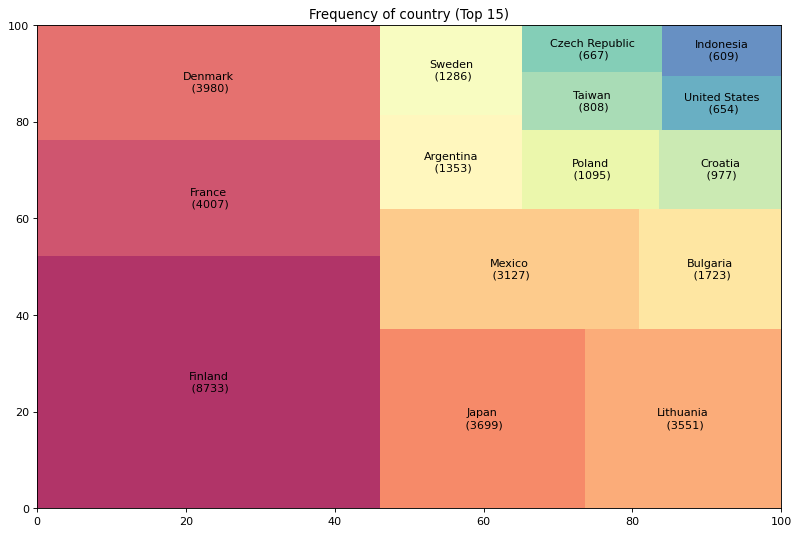

In [997]:
#creating a frequency plot for country column
df = covidstress.groupby('country').size().nlargest(15).reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
plt.title("Frequency of country (Top 15)")
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8);

In [998]:
covidstress["maritalstatus"].unique()

array(['Married/cohabiting', 'Single', 'Divorced/widowed',
       'Other or would rather not say', nan, 'Uninformative response'],
      dtype=object)

In [999]:
covidstress["maritalstatus"]=covidstress["maritalstatus"].str.replace("Uninformative response","Other or would rather not say")
covidstress['maritalstatus'].fillna('Other or would rather not say', inplace=True)

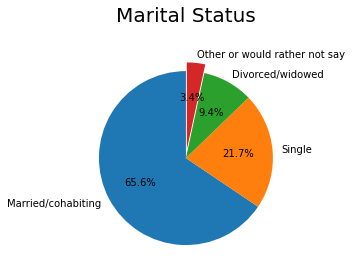

In [1000]:
#plt.figure(figsize = (15,5))
#plotting a pie chart for marital status
marstat = covidstress['maritalstatus'].value_counts()
plt.pie(marstat,autopct='%1.1f%%',startangle=90,explode = (0,0,0,0.1),labels=marstat.index)
plt.title('Marital Status', fontsize = 20, x = 0.5, y = 1.1);

In [1001]:
covidstress['riskgroup'].unique()

array(['No', 'Yes', nan, 'Not sure'], dtype=object)

In [1002]:
covidstress['riskgroup'].fillna('Not sure', inplace=True)

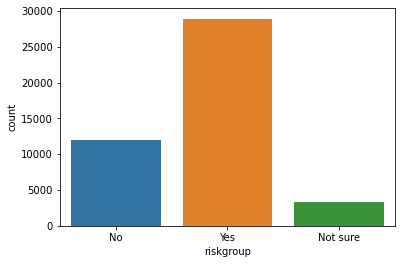

In [1003]:
#plt.figure(figsize=(20,10))
sns.countplot(covidstress["riskgroup"]);

In [1004]:
covidstress['perceived_stress_1'].unique()

array([1, 3, 2, 4, 5], dtype=int64)

In [1005]:
covidstress['corona_concerns_1'].unique()

array([5, 2, 1, 4, 3, 6], dtype=int64)

In [1006]:
covidstress['distress_1'].unique()

array([3, 4, 5, 2, 6, 1], dtype=int64)

In [1007]:
covidstress['social_support_1'].unique()

array([5, 6, 4, 3, 2, 1], dtype=int64)

In [1008]:
#taking a mean for each question category
covidstress['perceived_stress_avg'] = covidstress.iloc[:,10:15].mean(axis=1).round(2)
covidstress['corona_concerns_avg'] = covidstress.iloc[:,15:20].mean(axis=1).round(2)
covidstress['distress_avg'] = covidstress.iloc[:,20:26].mean(axis=1).round(2)
covidstress['social_support_avg'] = covidstress.iloc[:,26:29].mean(axis=1).round(2)

In [1009]:
#converting all values into a 10 point scale for readability and further analysis
covidstress['perceived_stress_avg'] = covidstress['perceived_stress_avg']*2
covidstress['corona_concerns_avg'] = covidstress['corona_concerns_avg']*(5/3)
covidstress['distress_avg'] = covidstress['distress_avg']*(5/3)
covidstress['social_support_avg'] = covidstress['social_support_avg']*(5/3)

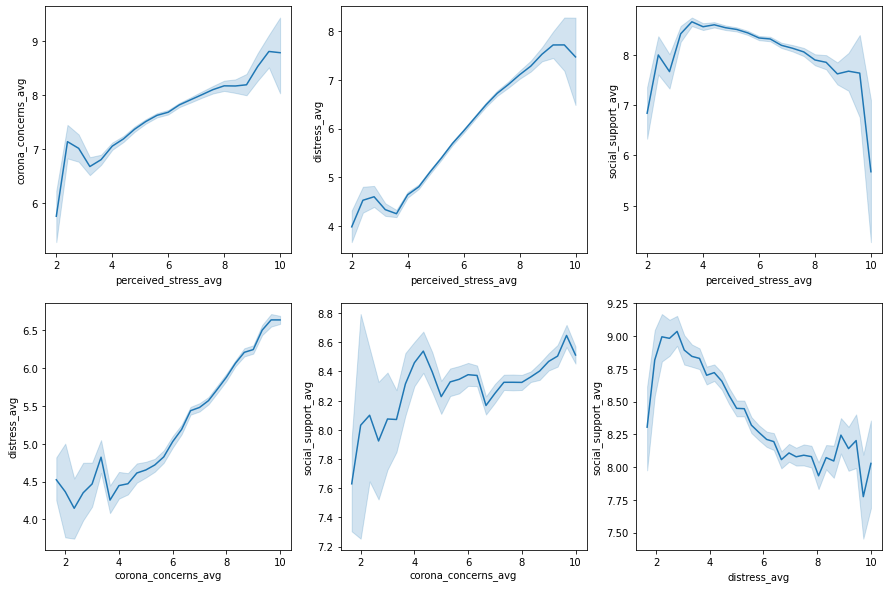

In [1010]:
#Plotting relationships between all average columns
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2, 3, 1)
sns.lineplot(x="perceived_stress_avg", y="corona_concerns_avg", data=covidstress,ax=ax)
ax = fig.add_subplot(2, 3, 2)
sns.lineplot(x="perceived_stress_avg", y="distress_avg", data=covidstress,ax=ax)
ax = fig.add_subplot(2, 3, 3)
sns.lineplot(x="perceived_stress_avg", y="social_support_avg", data=covidstress,ax=ax)
ax = fig.add_subplot(2, 3, 4)
sns.lineplot(x="corona_concerns_avg", y="distress_avg", data=covidstress,ax=ax)
ax = fig.add_subplot(2, 3, 5)
sns.lineplot(x="corona_concerns_avg", y="social_support_avg", data=covidstress,ax=ax)
ax = fig.add_subplot(2, 3, 6)
sns.lineplot(x="distress_avg", y="social_support_avg", data=covidstress,ax=ax)
plt.show()

In the perceived stress questions, the answer value 1 (NEVER) corresponds to never stressed and answer value 5 (ALWAYS) corresponds to very stressed. So the average value for each user will help us to identify where they stand in the range. An average value closer to 5 would mean they have extreme stress and a value closer to 1 would mean they are not stressed at all.

In the same way, the answer value 1 (STRONGLY DISAGREE) of corona concerns questions mean that the survey taker is not concerned but the value 6 (STRONGLY AGREE) means that they are extremely concerned about coronavirus. An average value closer to 6 would mean that they are extremely concerned.

Next, in the distress questions, the answer 1 (STRONGLY DISAGREE) corresponds to the survey taker not being distressed and the value 6 (STRONGLY AGREE) means that they are very distressed. An average value closer to 6 would mean that they are extremely distressed.

Lastly, for the social support questions, the value 1 (STRONGLY DISAGREE) means that the user does not have any social contacts for support and the value 6 (STRONGLY AGREE) means that they have people they can count on. An average value closer to 6 means that they have social support in their life and a value closer to 1 would mean they are lacking in social support.

In [1011]:
#creating a new column for average of the 3 columns: perceived_stress_avg, corona_concerns_avg, distress_avg
covidstress['ps_cc_dis_avg'] = covidstress.iloc[:,29:32].mean(axis=1).round(2)

In [1012]:
#taking a look at the mean values for all columns
covidstress.describe()

,id,duration_in_seconds,age,perceived_stress_1,perceived_stress_2,perceived_stress_3,perceived_stress_4,perceived_stress_5,corona_concerns_1,corona_concerns_2,...,distress_5,distress_6,social_support_1,social_support_2,social_support_3,perceived_stress_avg,corona_concerns_avg,distress_avg,social_support_avg,ps_cc_dis_avg
count,44126.000000,44126.000000,44126.000000,44126.000000,44126.000000,44126.000000,44126.000000,44126.000000,44126.000000,44126.000000,...,44126.000000,44126.000000,44126.000000,44126.000000,44126.000000,44126.000000,44126.000000,44126.000000,44126.000000,44126.000000
mean,62864.467842,2195.814667,42.117459,2.525903,3.004374,2.643430,3.608145,2.525631,4.101663,4.727372,...,4.430381,2.956602,5.029620,4.982754,5.039025,5.722993,7.593210,5.741814,8.362180,6.352685
std,35681.007869,7499.269461,12.252703,1.071283,1.098669,1.099366,0.974734,1.210703,1.436063,1.228724,...,1.360900,1.551268,1.064134,1.141262,1.063308,1.243039,1.623475,1.636017,1.626897,1.137338
min,6.000000,146.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.666667,1.666667,1.666667,1.780000
25%,32697.500000,848.000000,33.000000,2.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,...,4.000000,2.000000,5.000000,5.000000,5.000000,4.800000,6.666667,4.716667,7.783333,5.620000
50%,60238.000000,1100.000000,42.000000,3.000000,3.000000,3.000000,4.000000,2.000000,4.000000,5.000000,...,5.000000,3.000000,5.000000,5.000000,5.000000,5.600000,8.000000,5.833333,8.333333,6.390000
75%,93980.750000,1521.000000,50.000000,3.000000,4.000000,3.000000,4.000000,3.000000,5.000000,6.000000,...,6.000000,4.000000,6.000000,6.000000,6.000000,6.400000,8.666667,6.950000,10.000000,7.140000
max,125300.000000,406197.000000,110.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,10.000000,10.000000,10.000000,10.000000,10.000000


We can see the mean values for all answer columns above. Now to create a new column 'mental_health_risk', we are using the last two columns: 'social_support_avg' and 'ps_cc_dis_avg' as well as 'riskgroup' column. The mean of the social support column is 8.3 and the mean of the ps_cc_dis_avg column is 6.3. 

We are defining 4 categories of mental helath risk: No Risk, Low Risk, Medium Risk and High Risk. In order to find out which user falls under what category, we have total 8 conditions, which are shown in code below.

We are using the mean values of the columns social_support_avg and ps_cc_dis_avg in our conditions as our thresholds.

In [1013]:
#creating a list of our conditions
conditions = [
    ((covidstress['riskgroup'] == 'No') | (covidstress['riskgroup'] == 'Not sure')) & (covidstress['ps_cc_dis_avg'] <= 6) & (covidstress['social_support_avg'] > 8),
    (((covidstress['riskgroup'] == 'No') | (covidstress['riskgroup'] == 'Not sure'))  & (covidstress['ps_cc_dis_avg'] <= 6) & (covidstress['social_support_avg'] <= 8)) | (((covidstress['riskgroup'] == 'No') | (covidstress['riskgroup'] == 'Not sure')) & (covidstress['ps_cc_dis_avg'] > 6) & (covidstress['social_support_avg'] > 8)) | ((covidstress['riskgroup'] == 'Yes') & (covidstress['ps_cc_dis_avg'] <= 6) & (covidstress['social_support_avg'] > 8)),
    (((covidstress['riskgroup'] == 'No') | (covidstress['riskgroup'] == 'Not sure')) & (covidstress['ps_cc_dis_avg'] > 6) & (covidstress['social_support_avg'] <= 8)) | ((covidstress['riskgroup'] == 'Yes') & (covidstress['ps_cc_dis_avg'] <= 6) & (covidstress['social_support_avg'] <= 8)) | ((covidstress['riskgroup'] == 'Yes') & (covidstress['ps_cc_dis_avg'] > 6) & (covidstress['social_support_avg'] > 8)),
    (covidstress['riskgroup'] == 'Yes') & (covidstress['ps_cc_dis_avg'] > 6) & (covidstress['social_support_avg'] <= 8)
    ]

# creating a list of the values we want to assign for each condition
values = ['No Risk', 'Low Risk', 'Medium Risk', 'High Risk']

# creating a new column and using np.select to assign values to it using our lists as arguments
covidstress['mental_health_risk'] = np.select(conditions, values)
covidstress = covidstress.round(2)

In [1014]:
#taking a look at the number of rows for each risk category
covidstress['mental_health_risk'].value_counts()

Medium Risk    19135
Low Risk       15097
High Risk       5661
No Risk         4233
Name: mental_health_risk, dtype: int64

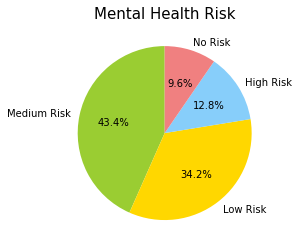

In [1015]:
#Plotting each risk category
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
mhealth = covidstress['mental_health_risk'].value_counts()
plt.pie(mhealth,autopct='%1.1f%%',startangle=90,labels= mhealth.index,colors=colors)
plt.title('Mental Health Risk', fontsize = 15);

In [1016]:
#function to calculate p-value and chi square values
def chifunc(table):
    
    stat, p, dof, expected = chi2_contingency(table)
    print("Results for ",str(table))
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        print('Dependent (reject H0): chi-square value -',stat)
    else:
        print('Independent (fail to reject H0): chi-square value -',stat)

    # interpret p-value
    alpha = 1.0 - prob
    if p <= alpha:
        print('Dependent (reject H0): p-value -',p)
    else:
        print('Independent (fail to reject H0): p-value -',p)

In [1017]:
#Contingency Table for mental_health_risk and gender columns
data_crosstab = pd.crosstab(covidstress['mental_health_risk'], 
                            covidstress['gender'],  
                               margins = False) 

In [1018]:
#looking at the relationship between the gender and the mental_health_risk columns
chifunc(data_crosstab)

Results for  gender              Female  Male  Other/would rather not say
mental_health_risk                                          
High Risk             3845  1753                          63
Low Risk              9646  5269                         182
Medium Risk          13391  5571                         173
No Risk               2443  1760                          30
Dependent (reject H0): chi-square value - 318.90937305549016
Dependent (reject H0): p-value - 7.234378261298765e-66


In [1019]:
#Contingency Table for mental_health_risk and education columns
data_crosstab2 = pd.crosstab(covidstress['edu'],  
                             covidstress['mental_health_risk'], margins = False) 
#looking at the relationship between the education and the mental_health_risk columns
chifunc(data_crosstab2)

Results for  mental_health_risk                                  High Risk  Low Risk  \
edu                                                                       
College degree, bachelor, master                         3061      8190   
Other or would rather not say                             123       231   
PhD/Doctorate                                             440      1679   
Some College, short continuing education or equ...       1162      3058   
Up to 12 years of school                                  686      1466   
Up to 6 years of school                                    97       254   
Up to 9 years of school                                    92       219   

mental_health_risk                                  Medium Risk  No Risk  
edu                                                                       
College degree, bachelor, master                          10507     2328  
Other or would rather not say                               358       34  
PhD/Doctora

In [1020]:
#Contingency Table for mental_health_risk and marital status columns
data_crosstab3 = pd.crosstab(covidstress['mental_health_risk'],  
                             covidstress['maritalstatus'], margins = False) 
#looking at the relationship between the marital status and the mental_health_risk columns
chifunc(data_crosstab3)

Results for  maritalstatus       Divorced/widowed  Married/cohabiting  \
mental_health_risk                                         
High Risk                        743                3106   
Low Risk                        1268               10306   
Medium Risk                     1814               12491   
No Risk                          314                3025   

maritalstatus       Other or would rather not say  Single  
mental_health_risk                                         
High Risk                                     228    1584  
Low Risk                                      520    3003  
Medium Risk                                   626    4204  
No Risk                                       124     770  
Dependent (reject H0): chi-square value - 416.91698942188964
Dependent (reject H0): p-value - 3.3563575897652015e-84


In [1021]:
#Contingency Table for mental_health_risk and employment columns
data_crosstab4 = pd.crosstab(covidstress['employment'],  
                             covidstress['mental_health_risk'], margins = False) 
#looking at the relationship between the employment and the mental_health_risk columns
chifunc(data_crosstab4)

Results for  mental_health_risk             High Risk  Low Risk  Medium Risk  No Risk
employment                                                              
Full time employed                  2690      8194         9833     2427
Not employed                         670      1051         1718      259
Other or would rather not say         45        96          135       31
Part time employed                   668      1488         2060      407
Retired                              306      1004         1014      210
Self-employed                        673      1769         2435      475
Student                              609      1495         1940      424
Dependent (reject H0): chi-square value - 279.0694277473037
Dependent (reject H0): p-value - 9.510987478812454e-49


In [1022]:
stress_perc = (covidstress[covidstress['perceived_stress_avg'] > 6].id.count()/covidstress.id.count()) * 100
stress_perc = stress_perc.round(2)
corona_concern_perc = (covidstress[covidstress['corona_concerns_avg'] > 6].id.count()/covidstress.id.count()) * 100
corona_concern_perc = corona_concern_perc.round(2)
distress_perc = (covidstress[covidstress['distress_avg'] > 6].id.count()/covidstress.id.count()) * 100
distress_perc = distress_perc.round(2)
social_perc = (covidstress[covidstress['social_support_avg'] <= 8].id.count()/covidstress.id.count()) * 100
social_perc = social_perc.round(2)

In [1023]:
print("% of total users who are stressed:", stress_perc)
print("% of total users who have coronavirus concerns:", corona_concern_perc)
print("% of total users who are distressed:", distress_perc)
print("% of total users who do not have social support:", social_perc)

% of total users who are stressed: 34.53
% of total users who have coronavirus concerns: 82.52
% of total users who are distressed: 44.65
% of total users who do not have social support: 30.36


In [1024]:
#creating a new dataframe for only high risk users
high_risk = covidstress[covidstress['mental_health_risk']=='High Risk']

In [1025]:
stress_perc = (high_risk[high_risk['perceived_stress_avg'] > 6].id.count()/high_risk.id.count()) * 100
stress_perc = stress_perc.round(2)
corona_concern_perc = (high_risk[high_risk['corona_concerns_avg'] > 6].id.count()/high_risk.id.count()) * 100
corona_concern_perc = corona_concern_perc.round(2)
distress_perc = (high_risk[high_risk['distress_avg'] > 6].id.count()/high_risk.id.count()) * 100
distress_perc = distress_perc.round(2)
social_perc = (high_risk[high_risk['social_support_avg'] <= 8].id.count()/high_risk.id.count()) * 100
social_perc = social_perc.round(2)

In [1026]:
print("% of high risk users who are stressed:", stress_perc)
print("% of high risk users who have coronavirus concerns:", corona_concern_perc)
print("% of high risk users who are distressed:", distress_perc)
print("% of high risk users who do not have social support:", social_perc)

% of high risk users who are stressed: 59.14
% of high risk users who have coronavirus concerns: 95.74
% of high risk users who are distressed: 73.13
% of high risk users who do not have social support: 100.0


In [1027]:
#creating a new datafrae for only medium risk users
med_risk = covidstress[covidstress['mental_health_risk']=='Medium Risk']

In [1028]:
stress_perc = (med_risk[med_risk['perceived_stress_avg'] > 6].id.count()/med_risk.id.count()) * 100
stress_perc = stress_perc.round(2)
corona_concern_perc = (med_risk[med_risk['corona_concerns_avg'] > 6].id.count()/med_risk.id.count()) * 100
corona_concern_perc = corona_concern_perc.round(2)
distress_perc = (med_risk[med_risk['distress_avg'] > 6].id.count()/med_risk.id.count()) * 100
distress_perc = distress_perc.round(2)
social_perc = (med_risk[med_risk['social_support_avg'] <= 8].id.count()/med_risk.id.count()) * 100
social_perc = social_perc.round(2)

In [1029]:
print("% of medium risk users who are stressed:", stress_perc)
print("% of medium risk users who have coronavirus concerns:", corona_concern_perc)
print("% of medium risk users who are distressed:", distress_perc)
print("% of medium risk users who do not have social support:", social_perc)

% of medium risk users who are stressed: 43.94
% of medium risk users who have coronavirus concerns: 92.17
% of medium risk users who are distressed: 58.45
% of medium risk users who do not have social support: 29.81


In [1030]:
#creating a new datafrae for only low risk users
low_risk = covidstress[covidstress['mental_health_risk']=='Low Risk']

In [1031]:
stress_perc = (low_risk[low_risk['perceived_stress_avg'] > 6].id.count()/low_risk.id.count()) * 100
stress_perc = stress_perc.round(2)
corona_concern_perc = (low_risk[low_risk['corona_concerns_avg'] > 6].id.count()/low_risk.id.count()) * 100
corona_concern_perc = corona_concern_perc.round(2)
distress_perc = (low_risk[low_risk['distress_avg'] > 6].id.count()/low_risk.id.count()) * 100
distress_perc = distress_perc.round(2)
social_perc = (low_risk[low_risk['social_support_avg'] <= 8].id.count()/low_risk.id.count()) * 100
social_perc = social_perc.round(2)

In [1032]:
print("% of low risk users who are stressed:", stress_perc)
print("% of low risk users who have coronavirus concerns:", corona_concern_perc)
print("% of low risk users who are distressed:", distress_perc)
print("% of low risk users who do not have social support:", social_perc)

% of low risk users who are stressed: 20.97
% of low risk users who have coronavirus concerns: 73.28
% of low risk users who are distressed: 26.99
% of low risk users who do not have social support: 13.45


In [1033]:
#creating a new datafrae for only no risk users
no_risk = covidstress[covidstress['mental_health_risk']=='No Risk']

In [1034]:
stress_perc = (no_risk[no_risk['perceived_stress_avg'] > 6].id.count()/no_risk.id.count()) * 100
stress_perc = stress_perc.round(2)
corona_concern_perc = (no_risk[no_risk['corona_concerns_avg'] > 6].id.count()/no_risk.id.count()) * 100
corona_concern_perc = corona_concern_perc.round(2)
distress_perc = (no_risk[no_risk['distress_avg'] > 6].id.count()/no_risk.id.count()) * 100
distress_perc = distress_perc.round(2)
social_perc = (no_risk[no_risk['social_support_avg'] <= 8].id.count()/no_risk.id.count()) * 100
social_perc = social_perc.round(2)

In [1035]:
print("% of no risk users who are stressed:", stress_perc)
print("% of no risk users who have coronavirus concerns:", corona_concern_perc)
print("% of no risk users who are distressed:", distress_perc)
print("% of no risk users who do not have social support:", social_perc)

% of no risk users who are stressed: 7.42
% of no risk users who have coronavirus concerns: 54.22
% of no risk users who are distressed: 7.16
% of no risk users who do not have social support: 0.0
